# part 1:

In [1]:
from queue import PriorityQueue
import random

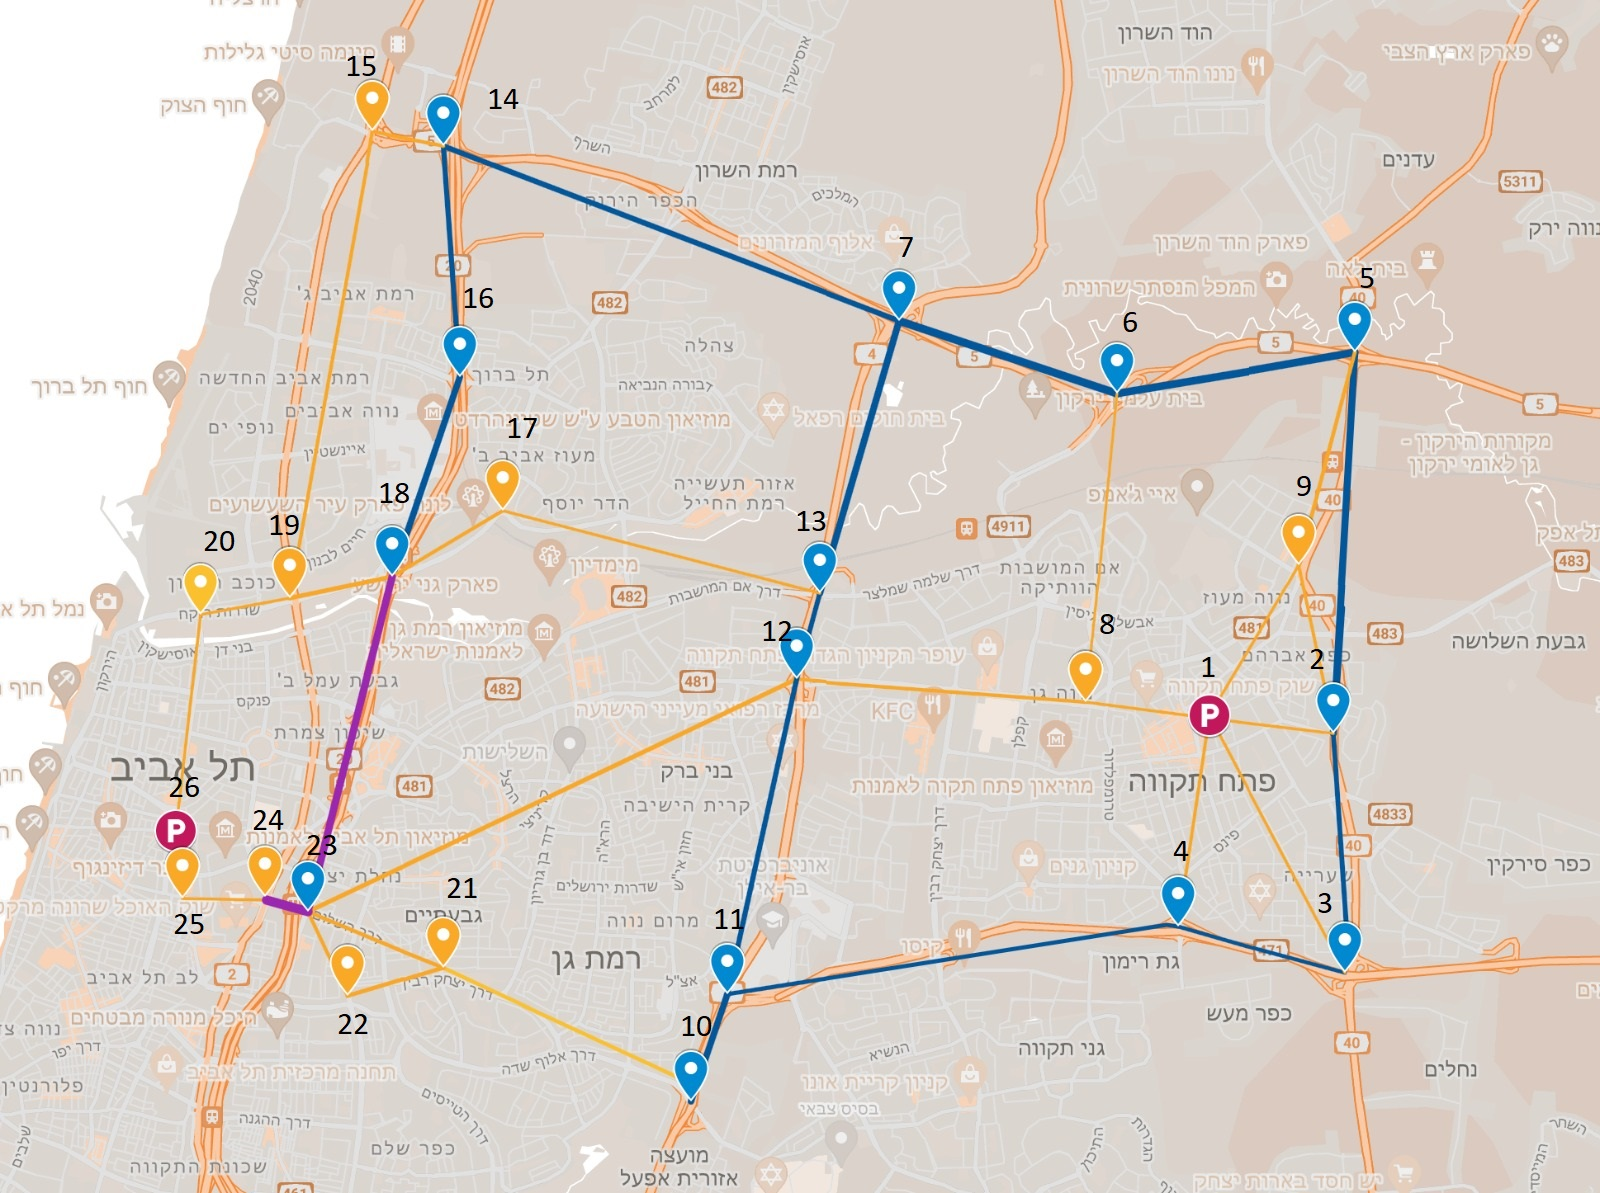

In [2]:
# edges (verticex 1, verticex 2, len, color of the road where 0 = yellow, 1 = blue, 2 = purple)
E = [(1,2,1.2,0),(1,8,1.2,0),(1,9,1.7,0),(1,3,2.9,0),(1,4,2.1,0),(2,9,1.6,0),(2,3,2.2,1),(2,5,5,1),(3,4,1.7,1),(4,11,4.5,1),(5,9,2.2,0),(5,6,2.4,1),(6,7,2.3,1),(6,8,3,0),(7,13,2.8,1),(7,14,4.8,1),(8,12,2.9,0),(10,11,1.1,1),(10,21,2.7,0),(11,12,3.2,1),(12,23,5.3,0),(13,17,3.2,0),(14,15,0.7,0),(14,16,2.2,1),(15,19,4.7,0),(16,18,2,1),(17,18,1.3,0),(18,23,3.4,2),(18,19,1,0),(19,20,0.9,0),(20,26,2.1,0),(21,22,1,0),(21,23,1.4,0),(22,23,0.9,0),(23,24,0.4,2),(24,25,0.8,0),(25,26,0.6,0)]

# vertices 1 = start and 26 = end.
V = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26]

In [3]:
def calc_time(E, traffic = False):
    E_time = []
    time = 0 
    if traffic:
        for edge in E:
            if edge[3] == 0:
                 time = edge[2]/20
                
            elif edge[3] == 1:
                 time = edge[2]/10
                
            else:
                time = edge[2]/5
                
            E_time.append((edge[0],edge[1],time))
    else:
        for edge in E:
            if edge[3] == 0:
                 time = edge[2]/30
                
            else:
                time = edge[2]/60
                
            E_time.append((edge[0],edge[1],time))
    return E_time

In [4]:
def dijkstra(E_time, V, start_node, end_node):
    v_weighted = {x:(float("inf"),None) for x in V}
    v_weighted[1] = (0,None)
    visited = set()
    pq = PriorityQueue()
    pq.put((start_node, 0))
    while not pq.empty():
        current = pq.get()
        if current[0] not in visited:
            
            visited.add(current[0])
            if current[0] == end_node:
                return v_weighted

            for edge in E_time:
                if edge[0] == current[0]:
                    
                    if edge[2] + v_weighted[edge[0]][0] < v_weighted[edge[1]][0]:
                        v_weighted[edge[1]] = (edge[2] + v_weighted[edge[0]][0],edge[0])
                        pq.put((edge[1],v_weighted[edge[1]][0]))
                    
                if edge[1] == current[0]:
                    if edge[2] + v_weighted[edge[1]][0] < v_weighted[edge[0]][0]:
                        v_weighted[edge[0]] = (edge[2] + v_weighted[edge[1]][0],edge[1])
                        pq.put((edge[0],v_weighted[edge[0]][0]))           

In [5]:
def get_route(V_weigthted, end_node):
    route = []
    current_key = end_node
    time = V_weigthted[current_key][0]
    while not V_weigthted[current_key][1] == None:
        route.append(current_key)
        current_key = V_weigthted[current_key][1]
    route.append(current_key)
    return route ,time   

In [6]:
V_weigthted_T = dijkstra(calc_time(E, traffic = True), V, 1, 26)

V_weigthted_F = dijkstra(calc_time(E, traffic = False), V, 1, 26)

print(V_weigthted_T)

print("###################################################################################################################")

print(V_weigthted_F)

{1: (0, None), 2: (0.06, 1), 3: (0.145, 1), 4: (0.10500000000000001, 1), 5: (0.195, 9), 6: (0.21, 8), 7: (1.03, 6), 8: (0.06, 1), 9: (0.08499999999999999, 1), 10: (0.665, 11), 11: (0.525, 12), 12: (0.205, 8), 13: (1.31, 7), 14: (1.51, 7), 15: (1.545, 14), 16: (1.73, 14), 17: (1.47, 13), 18: (1.15, 23), 19: (1.585, 18), 20: (1.63, 19), 21: (0.5399999999999999, 23), 22: (0.515, 23), 23: (0.47, 12), 24: (0.5499999999999999, 23), 25: (0.59, 24), 26: (0.62, 25)}
###################################################################################################################
{1: (0, None), 2: (0.04, 1), 3: (0.07666666666666666, 2), 4: (0.07, 1), 5: (0.12333333333333332, 2), 6: (0.14, 8), 7: (0.20166666666666666, 6), 8: (0.04, 1), 9: (0.056666666666666664, 1), 10: (0.16333333333333336, 11), 11: (0.14500000000000002, 4), 12: (0.13666666666666666, 8), 13: (0.24833333333333332, 7), 14: (0.2816666666666667, 7), 15: (0.305, 14), 16: (0.31833333333333336, 14), 17: (0.355, 13), 18: (0.351666666666

In [7]:
route_T , time_T = get_route(V_weigthted_T, 26)

route_F , time_F = get_route(V_weigthted_F, 26)

In [8]:
print("the route when there is trafic is:", route_T, "and the time is:", time_T, '\n')

print("the route when there is no trafic is:",route_F, "and the time is:", time_F)

the route when there is trafic is: [26, 25, 24, 23, 12, 8, 1] and the time is: 0.62 

the route when there is no trafic is: [26, 25, 24, 23, 21, 10, 11, 4, 1] and the time is: 0.3533333333333334


In [9]:
rand_edge = random.randrange(0, len(E))

acedent_E = E.copy()

acedent_E[rand_edge] = (E[rand_edge][0],E[rand_edge][1],float("inf"),E[rand_edge][3])

print(f"opss there whas an acedent in the road from {acedent_E[rand_edge][0]} to {acedent_E[rand_edge][1]} so we will find a new route")    

opss there whas an acedent in the road from 10 to 11 so we will find a new route


In [10]:
V_weigthted_T_acedent = dijkstra(calc_time(acedent_E, traffic = True), V, 1, 26)

route_T_acedent , time_T_acedent = get_route(V_weigthted_T_acedent, 26)

print(f"the route when there is trafic and an acedent in the road from {acedent_E[rand_edge][0]} to {acedent_E[rand_edge][1]} is:", route_T_acedent, "and the time is:", time_T_acedent)

the route when there is trafic and an acedent in the road from 10 to 11 is: [26, 25, 24, 23, 12, 8, 1] and the time is: 0.62


# part 2:

In [11]:
import osmnx as ox
import networkx as nx
from queue import PriorityQueue 

In [12]:
# Generate a map (from OSM library) for the area we work in.
mode = 'drive'        # 'drive', 'bike', 'walk'
graph = ox.graph_from_place('Tel Aviv, Israel', network_type = mode)

# define the start and end points of the route in latlng coordinates
# Use this app, for example, to get the lat-lan coordinates of a place:
# https://www.latlong.net/
# Google TLV
start_lnglat = (34.794, 32.070)

# Tel Aviv University
end_lnglat = (34.802, 32.115)


# #upsidedown

# # Google TLV
# end_lnglat = (34.794, 32.070)

# # Tel Aviv University
# start_lnglat = (34.802, 32.115)



# find the nearest node to the start location using OSM nearest node
orig_node = ox.nearest_nodes(graph, *start_lnglat)

# find the nearest node to the end location using OSM nearest node
dest_node = ox.nearest_nodes(graph, *end_lnglat)

#  find the shortest path using OSM library
shortest_route = nx.shortest_path(graph,
                                  orig_node,
                                  dest_node,
                                  weight='time')

ox.plot_route_folium(graph, shortest_route, tiles='openstreetmap')

In [13]:
all_nodes = graph.nodes
all_edges = graph.edges
print('There are:', len(all_nodes), 'nodes in the graph representing the Map.')
print('There are:', len(all_edges), 'edges in the graph representing the Map.')
print('Origin node is:',orig_node)
print('There are:', len(shortest_route), 'edges in the route we found above.')
print('')
# stats = ox.basic_stats(graph)   # This function - stats - returns all kind of statistics about the graph
# print(stats)  

print('Example: ALL the data stored for each road segment (edge) in the map graph:')
print(graph.edges(shortest_route[1], data=True))  # show all the attributes of an edge (a dictionary)

print('')

There are: 6500 nodes in the graph representing the Map.
There are: 12513 edges in the graph representing the Map.
Origin node is: 442893209
There are: 31 edges in the route we found above.

Example: ALL the data stored for each road segment (edge) in the map graph:
[(442893216, 442893205, {'osmid': 963722491, 'oneway': True, 'name': 'יגאל אלון', 'highway': 'tertiary', 'reversed': False, 'length': 83.921, 'geometry': <shapely.geometry.linestring.LineString object at 0x19302ea90>})]



In [14]:
for i in range(1,min(10,len(shortest_route))):   #shortest_route
    node = shortest_route[i]
    print('From node',node,'you can proceed to:')
    for from_node, to_node, att in graph.edges(node, data=True):  # data=True: returns ALL the attributes for each node
        print('- Road Seg.',att["osmid"], att.setdefault("name","no name"), 'going from node', from_node, 'to', to_node,)     

From node 442893216 you can proceed to:
- Road Seg. 963722491 יגאל אלון going from node 442893216 to 442893205
From node 442893205 you can proceed to:
- Road Seg. 225708346 יגאל אלון going from node 442893205 to 2473987340
- Road Seg. 203762918 השלום going from node 442893205 to 1228098
From node 2473987340 you can proceed to:
- Road Seg. 239616075 השלום going from node 2473987340 to 2344604151
- Road Seg. 239616073 יגאל אלון going from node 2473987340 to 2137606211
From node 2344604151 you can proceed to:
- Road Seg. 225708345 יגאל אלון going from node 2344604151 to 1329704
- Road Seg. 184657041 גבעת התחמושת going from node 2344604151 to 2344604158
From node 2344604158 you can proceed to:
- Road Seg. 184657041 גבעת התחמושת going from node 2344604158 to 8319637684
From node 8319637684 you can proceed to:
- Road Seg. 966536980 גבעת התחמושת going from node 8319637684 to 286643575
- Road Seg. 239616099 no name going from node 8319637684 to 2989922193
From node 2989922193 you can proceed t

In [15]:
# Dijkstra Algorithm for Shortest Path
def dijkstra0(graph, start_node, end_node, flag = True):
    pq = PriorityQueue()
    pq.put((0, [start_node]))  # Start route by adding the start_node to the route_queue with value = 0
    
    visited = set()
    distence = 0
    while not pq.empty():
        (dist, route) = pq.get()  # get pops the element with *min weight* in the queue
        visited.add(route[-1])  # looks at the last element (=node) in the route list and mark it was visited by our D algo.
        if route[-1] == end_node: # if we are looking at the destination node - We are done. We found a route
            if flag:
                print(f"###### this is for Q 2.1 where we whant to know in how many vertice we visitid: {len(visited)}")
                print(f"###### this is for Q 2.2 where we whant to know what is the distance: {dist} \n")
            for i in range(0,len(route)):   
                node = route[i]
                for from_node, to_node, att in graph.edges(node, data=True):  # data=True: returns ALL the attributes for each node
                    if node != end_node and to_node == route[i+1]:
                        distence += att["length"]
                        if flag:
                            print('- Road Seg.',att["osmid"], att.setdefault("name","no name"), 'going from node', from_node, 'to', to_node,'\n'
                              ,"the lenth of the road is:",att["length"],"and the distence till now is:",distence,'\n')
            if flag:
                print('Found Route! the above is for Q 2.3 ^ ')
            return (route, dist)
        for from_node, to_node, att in graph.edges(route[-1], data=True):  # Looks at all the nodes we can reach (i.e., looks at all the edges from current node and what new node they arrive to)
            if to_node not in visited:   # If we can reach a node *not* visited so far, then:
                pq.put((dist + att['length'], route + [to_node]))  # Add to our queue this new "option": To arrive to node "to_node" using a path of nodes we keep in "route" and we note the cost to go through this path is "dist" we keep track of for each route we check
    print('Route not found!')

In [16]:
my_route = dijkstra0(graph, orig_node, dest_node)

###### this is for Q 2.1 where we whant to know in how many vertice we visitid: 4795
###### this is for Q 2.2 where we whant to know what is the distance: 5854.307000000001 

- Road Seg. 963722491 יגאל אלון going from node 442893209 to 442893216 
 the lenth of the road is: 146.997 and the distence till now is: 146.997 

- Road Seg. 963722491 יגאל אלון going from node 442893216 to 442893205 
 the lenth of the road is: 83.921 and the distence till now is: 230.918 

- Road Seg. 225708346 יגאל אלון going from node 442893205 to 2473987340 
 the lenth of the road is: 15.535 and the distence till now is: 246.453 

- Road Seg. 239616073 יגאל אלון going from node 2473987340 to 2137606211 
 the lenth of the road is: 26.933 and the distence till now is: 273.386 

- Road Seg. 239616073 יגאל אלון going from node 2137606211 to 8914420752 
 the lenth of the road is: 102.207 and the distence till now is: 375.593 

- Road Seg. 239616073 יגאל אלון going from node 8914420752 to 8914420754 
 the lenth of 

In [17]:
ox.plot_route_folium(graph, my_route[0], tiles='openstreetmap')

In [18]:
# Dijkstra Algorithm for Shortest Path
def dijkstra1(graph, start_node, end_node, allowed_fn = lambda x: True,flag = True):
    pq = PriorityQueue()
    pq.put((0, [start_node]))
    visited = set()
    while not pq.empty():
        (dist, route) = pq.get()  # get pops the element with min weight in the queue
        visited.add(route[-1])  # looks at the last element in the route list
        for _, to_node, att in graph.edges(route[-1], data=True):
            if to_node == end_node: # for Q 2.4 stop when we see the last end_node at the first time.
#               pq.put((dist + att['length'], route + [to_node]))
                if flag: 
                    print(f"###### this is for Q 2.1 (for Q 2.4) where we whant to know in how many vertice we visitid: {len(visited)+1}")
                    print(f"###### this is for Q 2.2 (for Q 2.4) where we whant to know what is the distance: {dist+att['length']}")
                    print('found route!')
                return (route + [to_node], dist+att['length'])
            
            if to_node not in visited:
                pq.put((dist + att['length'], route + [to_node]))
    print('not found!')

In [19]:
my_route = dijkstra1(graph, orig_node, dest_node)
print(f"this is the route: {my_route[0]}")

###### this is for Q 2.1 (for Q 2.4) where we whant to know in how many vertice we visitid: 4688
###### this is for Q 2.2 (for Q 2.4) where we whant to know what is the distance: 5854.307000000001
found route!
this is the route: [442893209, 442893216, 442893205, 2473987340, 2137606211, 8914420752, 8914420754, 2473987367, 7284338856, 2344604154, 1411567099, 3762374460, 10018819914, 9909067500, 1930530610, 1107293658, 17703736, 3875242261, 1312216087, 968515552, 968515555, 270425885, 291706037, 358864411, 359206506, 4079232702, 4079232703, 270425997, 312283100, 312283187, 2432701015, 342293399, 6479028838, 4755318774, 4755318765, 316022680, 316022676, 1104543108, 3496916403, 1127659175, 1127659131, 6483807580, 1127659115, 1127659117, 1127659147, 1143925330, 1143925333, 1147945624, 1127659154, 289069620, 3496916410, 841613527, 840916373]


In [20]:
ox.plot_route_folium(graph, my_route[0], tiles='openstreetmap')

In [21]:
# Google up left TLV
left_up_lnglat = (34.774303, 32.0961)
# Google up right TLV
right_up_lnglat = (34.791126, 32.0961)
# Google down left TLV
left_down_lnglat = (34.774303, 32.051007)
# Google down right TLV
right_down_lnglat = (34.791126, 32.051007)
graph = ox.graph_from_place('Tel Aviv, Israel', network_type = 'drive')
n = 200
distence_0 = 0
distence_1 = 0

for i in range(n):
    start_lnglat = (random.uniform(34.774303, 34.791126), random.uniform(32.051007, 32.0961))
    end_lnglat = (random.uniform(34.774303, 34.791126), random.uniform(32.051007, 32.0961))
    # find the nearest node to the start/end locations
    orig_node = ox.nearest_nodes(graph, *start_lnglat)
    dest_node = ox.nearest_nodes(graph, *end_lnglat)
    distence_00 = dijkstra0(graph, orig_node, dest_node, False)
    distence_11 = dijkstra1(graph, orig_node, dest_node, flag = False)
    if distence_00:
        distence_0 += distence_00[1]
    if distence_11:    
        distence_1 += distence_11[1]
        if distence_11[1] < distence_00[1]:
            print(f"dis 1: {distence_11[1]}, dis 2: {distence_00[1]}, start: {orig_node} end: {dest_node}")
avg_distence_0 = distence_0/n
avg_distence_1 = distence_1/n
print(f"for dijkstra_0 (where we stop only when we take the end node out of the Q) \n we got an avrege distance of: {avg_distence_0}")
print(f" and for dijkstra_1 we got an avrege distance of: {avg_distence_1}")


    

Route not found!
not found!
for dijkstra_0 (where we stop only when we take the end node out of the Q) 
 we got an avrege distance of: 2576.4279200000005
 and for dijkstra_1 we got an avrege distance of: 2578.4926500000006


# 2.5: כמו שניתן לראות דייסטרה 0 יעילה יותר היות ואנחנו לא עוצרים ברגע שרואים את קודקוד הסיום ועל כן בחלק מהמקרים מוצאים מסלול יעיל יותר

In [22]:
# Example with some street names are blocked and cannot use them
blocked_streets = set()

def is_not_blocked(att):
    streetnames = att.get('name')
    if streetnames is None:
        streetnames = []   # if no street name, return empty list
    if isinstance(streetnames, str):
        streetnames = [streetnames] # if only one street name = return a list with this oner street name
    return blocked_streets.isdisjoint(streetnames) # if many street names, return a list with all these names and we ask, is any of these street names is blocked
   

#%%

blocked_streets.add('איילון צפון')
blocked_streets.add('נמיר')
#blocked_streets.add('השלום')
#blocked_streets.add('תובל')
#blocked_streets.add('יגאל אלון')


route_with_blocked_streets = dijkstra1(graph, orig_node, dest_node, is_not_blocked)
ox.plot_route_folium(graph, route_with_blocked_streets[0], tiles='openstreetmap')

#%%

# I put the code that shows all nodes in the shortest route here again
# so you can see the names of the road segmants along the selected route and block some of them in the code above
#and see how the algorithm finds a new route without them. Try it.

# Finds node's edge neighbours, and print their attributes
for i in range(1,min(99,len(route_with_blocked_streets[0]))):   #shortest_route
    node = route_with_blocked_streets[0][i]
    print('From node',node,'you can proceed to:')
    for from_node, to_node, att in graph.edges(node, data=True):  # data=True: returns ALL the attributes for each node
        print('- Road Seg.',att["osmid"], att.setdefault("name","no name"), 'going from node', from_node, 'to', to_node,)

#%%

###### this is for Q 2.1 (for Q 2.4) where we whant to know in how many vertice we visitid: 3280
###### this is for Q 2.2 (for Q 2.4) where we whant to know what is the distance: 3835.2870000000003
found route!
From node 1473050781 you can proceed to:
- Road Seg. 133864714 no name going from node 1473050781 to 1473050786
- Road Seg. 229941487 החשמונאים going from node 1473050781 to 10127374867
From node 1473050786 you can proceed to:
- Road Seg. 1106743804 מנחם בגין going from node 1473050786 to 5163546151
From node 5163546151 you can proceed to:
- Road Seg. 1005231740 מנחם בגין going from node 5163546151 to 3699681066
- Road Seg. [1053696062, 1053696063] מנחם בגין going from node 5163546151 to 3693554179
From node 3693554179 you can proceed to:
- Road Seg. 365919037 מנחם בגין going from node 3693554179 to 4014513958
- Road Seg. 406956748 התעשיה going from node 3693554179 to 4089921570
- Road Seg. [1053696062, 1053696063] מנחם בגין going from node 3693554179 to 5163546151
From node 401

# 3 א:

# ראשית אציין כי גם אם עובדים עם סטיסטיקה אמינה זה עדיין לא מנבא את העתיד ועל כן תמיד יהיו סטיות העיניין הוא שלפעמים הסטיות יכולות להיות ענקיות (בישראל יותר מלפעמים) היות שיש תאונות (דבר שלא ניתן לצפות) המון שיפוצים, חסימות נתיבים, הצפות ועוד, כל אלה מקשים מאד על אלגוריתמים לספק הערכה מדויקת 

# 3 ב:

# נאמר ואנחנו נוסעים מנתניה לתל אביב נרצה שהאלגוריתם יחשב את את המסלול כך שכשאנחנו יוצאים מנתניה הוא יסתמך בחישוב המשקלים על הערכה של מצב תנועה עתידי (לדוגמא יחשב את הקשת בין הרצליה לתל אביב לפי הערכה של עשרים דקות קדימה) ובנוסף נרצה שבזמן הנסיעה האלגוריתם יבדוק שהוא אכן פוגע ובעצם יבדוק מה קורה כרגע בכל מקום במסלול שלנו שנמצא יותר מ10 דק מאיתנו, נרצה שיבדוק אם מצב התנועה באזורים אלו תואם את הצפייה שהייתה לו שהתחלנו לנסוע או לא נבצע חישוב על המידע החדש ובכך נעריך תוך כדי נסיעה את מצב התנועה

# Auto-complete:

In [1]:

f = open('text-EN.txt','r')

text0 = f.read()
    
f.close()

print(text0[0:999])
print()

text0 = text0.lower()

print("len(text0) = ",len(text0))

legalABC='abcdefghijklmnopqrstuvwxyz '
text=''
last_was_space = True
for ch in text0:
    if ch=='\n':
        ch=' '
        # print('Newline detected')
    if ch in legalABC:
        if ch!=" ":
            text= text + ch
            last_was_space = False
        if ch==" " and last_was_space==False:
            text= text + ch
            last_was_space = True

print()
print(text[0:999])
print()
print("len(text) = ",len(text)," (",len(text0)-len(text),") less characters")



 The last weeks of the year are a festive time in most countries; but while Europeans just celebrate Christmas and the New Year, Americans begin their festive season about a month earlier. The feast of Thanksgiving, celebrated on the fourth Thursday in November, is second only in importance to Christmas in the American calendar of feast days.
    Thanksgiving is the oldest non-Indian tradition in the United States, and was first celebrated in the year 1621. It was in this year that the men and women in Plymouth, one of the first New England colonies, decided to establish a feast day to mark the end of the farming year.
    As devout Protestants, they called their feast day "Thanksgiving", a day on which people could celebrate and give thanks to God for the crops that they had managed to grow and harvest. This was not in fact an original idea, but was based on the English "Harvest Festival", an old custom whereby people gave thanks to God once the crops were all in.
    In America howe


In [2]:

# Source: https://towardsdatascience.com/implementing-a-trie-data-structure-in-python-in-less-than-100-lines-of-code-a877ea23c1a1

from typing import Tuple

class TrieNode(object):
    """
    Our trie node implementation. Very basic. but does the job
    """
    
    def __init__(self, char: str):
        self.char = char
        self.children = []
        self.parent = None
        # Is it the last character of the word.
        self.word_finished = False
        # How many times this character appeared in the addition process
        self.counter = 1
    

def add(root, word: str):
    """
    Adding a word in the trie structure
    """
    node = root
    for char in word:
        found_in_child = False
        # Search for the character in the children of the present `node`
        for child in node.children:
            if child.char == char:
                # We found it, increase the counter by 1 to keep track that another word has it as well
                child.counter += 1
                # And point the node to the child that contains this char
                node = child
                found_in_child = True
                break
        # We did not find it so add a new chlid
        if not found_in_child:
            new_node = TrieNode(char)
            new_node.parent = node
            node.children.append(new_node)
            # And then point node to the new child
            node = new_node
    # Everything finished. Mark it as the end of a word.
    node.word_finished = True


if __name__ == "__main__":
    root = TrieNode('*')

    
working_text= text

# Fill the Trie with all the words in our training text

while working_text.find(' ')!=-1 or working_text.find('\n')!=-1:  # as long as there are more words in the text
    end_word_index = working_text.find(' ')
    current_word = working_text[0:end_word_index]
    print('Adding to Trie: ',current_word)
    add(root, current_word)
    working_text = working_text[end_word_index+1:]



Adding to Trie:  the
Adding to Trie:  last
Adding to Trie:  weeks
Adding to Trie:  of
Adding to Trie:  the
Adding to Trie:  year
Adding to Trie:  are
Adding to Trie:  a
Adding to Trie:  festive
Adding to Trie:  time
Adding to Trie:  in
Adding to Trie:  most
Adding to Trie:  countries
Adding to Trie:  but
Adding to Trie:  while
Adding to Trie:  europeans
Adding to Trie:  just
Adding to Trie:  celebrate
Adding to Trie:  christmas
Adding to Trie:  and
Adding to Trie:  the
Adding to Trie:  new
Adding to Trie:  year
Adding to Trie:  americans
Adding to Trie:  begin
Adding to Trie:  their
Adding to Trie:  festive
Adding to Trie:  season
Adding to Trie:  about
Adding to Trie:  a
Adding to Trie:  month
Adding to Trie:  earlier
Adding to Trie:  the
Adding to Trie:  feast
Adding to Trie:  of
Adding to Trie:  thanksgiving
Adding to Trie:  celebrated
Adding to Trie:  on
Adding to Trie:  the
Adding to Trie:  fourth
Adding to Trie:  thursday
Adding to Trie:  in
Adding to Trie:  november
Adding to Tr

In [3]:

 def find_prefix(root, prefix: str) -> Tuple[bool, int, TrieNode]:
    """
    Check and return 
      1. If the prefix exsists in any of the words we added so far
      2. If yes then how many words actually have the prefix
      3. The node where the profix ends in the Trie structure
    """
    node = root
    # If the root node has no children, then return False.
    # Because it means we are trying to search in an empty trie
    if not root.children:
        return False, 0, node
    for char in prefix:
        char_not_found = True
        # Search through all the children of the present `node`
        for child in node.children:
            if child.char == char:
                # We found the char existing in the child.
                char_not_found = False
                # Assign node as the child containing the char and break
                node = child
                break
        # Return False anyway when we did not find a char.
        if char_not_found:
            return False, 0, node
    # Well, we are here means we have found the prefix. Return true to indicate that
    # And also the counter of the last node. This indicates how many words have this
    # prefix
    return True, node.counter, node


def list_all_children(root, prefix: str):
    """
    Returns all the children of the node at the end of a profix, with the counter for each child
    """
    node = root
    auto_complete_word = prefix
    (exists, counter, node) = find_prefix(root, auto_complete_word)
    print('This prefix occours ',counter, ' times.')
    
    for child in node.children:
        print(child.char, child.counter)
    
    return


user_word = input("Enter a word: ")

user_word = user_word.lower()

# show how it will suggest autocomplete after each character

user_text_so_far = ''

for i in user_word:
    # Search the Trie for a word that starts with first i-character user typed,
    # and is most likely to be types based on the Trie probabilites
    user_text_so_far = user_text_so_far + i
    print("user_text_so_far",user_text_so_far)
    list_all_children(root, user_text_so_far)


Enter a word: bye
user_text_so_far b
This prefix occours  366  times.
u 75
e 122
a 52
r 29
y 39
o 15
i 24
l 10
user_text_so_far by
This prefix occours  39  times.
user_text_so_far bye
This prefix occours  0  times.


In [4]:
from collections import deque
def auto_complete(root, prefix: str) -> str:
    """
    This function is *not* written yet. You will complete it in the homework assignment 
    Suggests the most probable ending to the prefix typed so far by the user
    """ 
    max_word = (None,0)
    string = ""
    prefix = find_prefix(root,prefix)
    if  not prefix[0]:
        return string
    current_node = prefix[2]
    stack = deque()
    for child in current_node.children:
        stack.append(child)
    while len(stack) > 0:
        current_node = stack.pop()
        if len(current_node.children) == 0 : 
            counter = current_node.counter
        else : 
            counter = current_node.counter
            for child in current_node.children:
                counter -= child.counter
        if  current_node.word_finished & (counter > max_word[1]):
            max_word = (current_node, counter)
        for child in current_node.children:
            stack.append(child)
                        
    node = max_word[0]
    while node.char != '*':
        string = node.char+string
        node= node.parent
    return string


In [5]:
# show how it will suggest autocomplete after each character
user_word = input("Enter a word: ")
string_biulder = ""
for char in user_word:
    string_biulder += char
    comp = auto_complete(root, string_biulder)
    if comp == "":
         print("cant complete "+ string_biulder + ", no such prefix ")
    else:
        print("complete "+ string_biulder + " : " + comp)


Enter a word: bye
complete b : by


AttributeError: 'NoneType' object has no attribute 'char'

In [6]:
from collections import Counter


probs = dict(Counter(text))
probs = sorted(probs.items(), key=lambda x: x[1], reverse=True)

# probabilities : 
[(' ', 7154), ('e', 4234), ('t', 3340), ('a', 2820), ('o', 2632), ('n', 2569), ('i', 2546), ('r', 2194), ('s', 2155), ('h', 1729), ('l', 1506), ('d', 1214), ('c', 1141), ('u', 969), ('m', 819), ('f', 794), ('g', 738), ('y', 648), ('p', 630), ('w', 629), ('b', 550), ('v', 422), ('k', 171), ('x', 50), ('j', 37), ('q', 26), ('z', 16)]

In [7]:



class NodeTree(object):
    def __init__(self, left=None, right=None):
        self.left = left
        self.right = right

    def children(self):
        return self.left, self.right

    def __str__(self):
        return self.left, self.right


def huffman_code_tree(node, binString=''):
    '''
    Function to find Huffman Code
    '''
    if type(node) is str:
        return {node: binString}
    (l, r) = node.children()
    d = dict()
    d.update(huffman_code_tree(l, binString + '0'))
    d.update(huffman_code_tree(r, binString + '1'))
    return d


def make_tree(nodes):
    '''
    Function to make tree
    :param nodes: Nodes
    :return: Root of the tree
    '''
    while len(nodes) > 1:
        (key1, c1) = nodes[-1]
        (key2, c2) = nodes[-2]
        nodes = nodes[:-2]
        node = NodeTree(key1, key2)
        nodes.append((node, c1 + c2))
        nodes = sorted(nodes, key=lambda x: x[1], reverse=True)
    return nodes[0][0]






In [8]:
node = make_tree(probs)
encoding = huffman_code_tree(node)

first_1000 = text[:1000]
encode = ""
for c in first_1000:
    encode += encoding[c]
print("it takes ",len(encode), " bits to encode the first 1000 characters.")
print("the complexity is ", 8000.0/len(encode) , " times better.")

it takes  4108  bits to encode the first 1000 characters.
the complexity is  1.9474196689386563  times better.


In [9]:
f = open('sample-text-file.txt','r')

text0 = f.read()
    
f.close()


text0 = text0.lower()



legalABC='abcdefghijklmnopqrstuvwxyz '
text=''
last_was_space = True
for ch in text0:
    if ch=='\n':
        ch=' '
        # print('Newline detected')
    if ch in legalABC:
        if ch!=" ":
            text= text + ch
            last_was_space = False
        if ch==" " and last_was_space==False:
            text= text + ch
            last_was_space = True

            
probs1 = dict(Counter(text))
probs1 = sorted(probs1.items(), key=lambda x: x[1], reverse=True)

print("first probs: " , probs)
print("\n")
print("second probs: " , probs1)



first probs:  [(' ', 7154), ('e', 4234), ('t', 3340), ('a', 2820), ('o', 2632), ('n', 2569), ('i', 2546), ('r', 2194), ('s', 2155), ('h', 1729), ('l', 1506), ('d', 1214), ('c', 1141), ('u', 969), ('m', 819), ('f', 794), ('g', 738), ('y', 648), ('p', 630), ('w', 629), ('b', 550), ('v', 422), ('k', 171), ('x', 50), ('j', 37), ('q', 26), ('z', 16)]


second probs:  [(' ', 58109), ('e', 56003), ('i', 42631), ('s', 41431), ('a', 36650), ('r', 35209), ('n', 34478), ('t', 33933), ('o', 29054), ('l', 26399), ('c', 19910), ('d', 19367), ('u', 16501), ('g', 14299), ('p', 14119), ('m', 12944), ('h', 10402), ('b', 9047), ('y', 8349), ('f', 6876), ('v', 5130), ('w', 4127), ('k', 3943), ('x', 1391), ('q', 870), ('j', 807), ('z', 715)]


# 5.4
 ניתן לראות הבדלים בין טבלאות השכיחויות, אך עם זאת הטבלאות דיי דומות אחת לשנייה, מה שאומר שגם אם נכין את טבלת השכיחויות מטקסט 1 ונשתמש בה על טקסט 2
נצליח לקודד ברמת יעילות יחסית טובה.
כמובן שאם נרצה את היעילות המיטבית נצטרך לבנות עץ חדש עבור כל טקסט שיהיה מותאם לו.